In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('maintenance.csv')

In [ ]:
df.head()

In [ ]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [ ]:
df.shape

(10000, 8)

In [ ]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Failure_Type_encoded'] = le.fit_transform(df['Failure Type'])
df['Type_encoded'] = le.fit_transform(df['Type'])


In [7]:
df.drop(['Failure Type','Type'],axis=1,inplace=True)

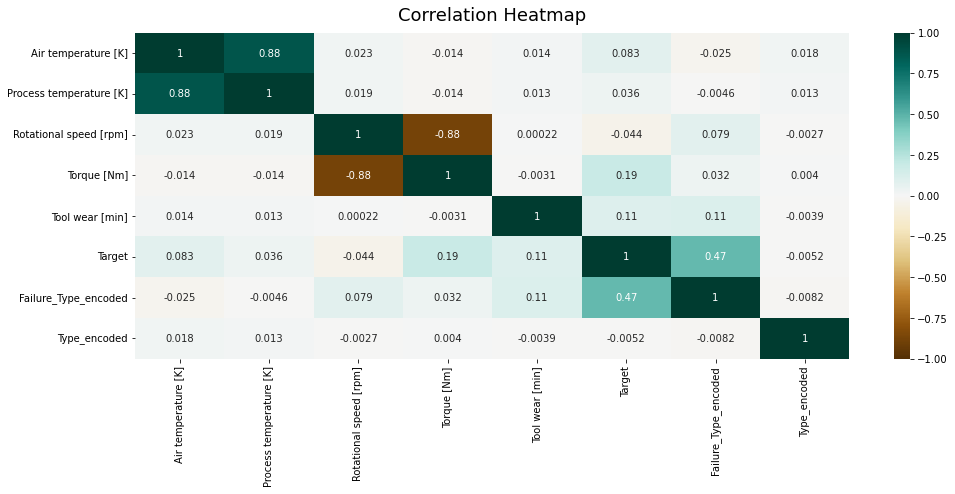

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

In [8]:
df_copy = df.copy()
df.drop(['Failure_Type_encoded'],axis=1,inplace=True)


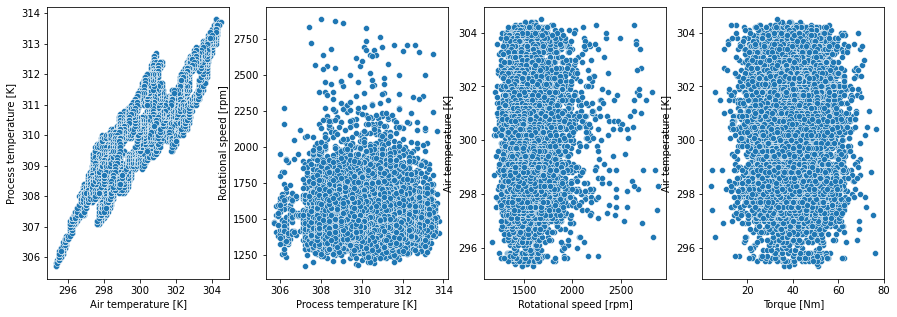

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, figsize=(15,5))


# Plot the scatterplots in each subplot
sns.scatterplot(data=df, x='Air temperature [K]', y='Process temperature [K]', ax=axs[0])
sns.scatterplot(data=df, x='Process temperature [K]', y='Rotational speed [rpm]', ax=axs[1])
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Air temperature [K]', ax=axs[2])
sns.scatterplot(data=df, x='Torque [Nm]', y='Air temperature [K]', ax=axs[3])

# Display the plot
plt.show()

In [10]:
import pandas as pd


# Select only columns with numerical values
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric 

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [12]:
for col, num_null in df_numeric.isnull().sum().items():
    if num_null != 0:
        print(col, num_null)

## Feature Selection Sequential Feature Selection (SFS)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)
split = TimeSeriesSplit(n_splits = 3)
sfs = SequentialFeatureSelector(rr,n_features_to_select=5,direction = "forward",cv = split)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Perform feature selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=5)
sfs.fit(df_scaled, df_scaled['Target'])

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          n_features_to_select=5)

In [ ]:
selected_features_idx = sfs.get_support(indices=True)

# Get the selected feature names
selected_features_names = df.columns[selected_features_idx]

In [ ]:
print(selected_features_names)
selected_features_names1 = list(selected_features_names)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Target'],
      dtype='object')


In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]']],df[['Target']], test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d a

LogisticRegression Accuracy: 0.9725
LogisticRegression Precision: 0.93993025
LogisticRegression Recall: 0.9695
LogisticRegression F1-score: 0.9544861640010155
LogisticRegression Confusion Matrix:
 [[1939    0]
 [  61    0]]
GaussianNB Accuracy: 0.9645
GaussianNB Precision: 0.93993025
GaussianNB Recall: 0.9695
GaussianNB F1-score: 0.9544861640010155
GaussianNB Confusion Matrix:
 [[1939    0]
 [  61    0]]
RandomForestClassifier Accuracy: 0.98
RandomForestClassifier Precision: 0.93993025
RandomForestClassifier Recall: 0.9695
RandomForestClassifier F1-score: 0.9544861640010155
RandomForestClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
KNeighborsClassifier Accuracy: 0.97
KNeighborsClassifier Precision: 0.93993025
KNeighborsClassifier Recall: 0.9695
KNeighborsClassifier F1-score: 0.9544861640010155
KNeighborsClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
MLPClassifier Accuracy: 0.9755
MLPClassifier Precision: 0.93993025
MLPClassifier Recall: 0.9695
MLPClassifier F1-score

c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


Accuracy: 0.9705
SVC Precision: 0.93993025
SVC Recall: 0.9695
SVC F1-score: 0.9544861640010155
SVC Confusion Matrix:
 [[1939    0]
 [  61    0]]


## Univariate Feature Selection with SelectKBest

In [ ]:
X = df.drop('Target' , axis =1)
y = df['Target']

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#Select top 5 features based on mutual info regression
selector = SelectKBest(mutual_info_classif, k =5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']],df[['Target']], test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d a

LogisticRegression Accuracy: 0.9725
LogisticRegression Precision: 0.93993025
LogisticRegression Recall: 0.9695
LogisticRegression F1-score: 0.9544861640010155
LogisticRegression Confusion Matrix:
 [[1939    0]
 [  61    0]]
GaussianNB Accuracy: 0.9645
GaussianNB Precision: 0.93993025
GaussianNB Recall: 0.9695
GaussianNB F1-score: 0.9544861640010155
GaussianNB Confusion Matrix:
 [[1939    0]
 [  61    0]]
RandomForestClassifier Accuracy: 0.9835
RandomForestClassifier Precision: 0.93993025
RandomForestClassifier Recall: 0.9695
RandomForestClassifier F1-score: 0.9544861640010155
RandomForestClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
KNeighborsClassifier Accuracy: 0.9705
KNeighborsClassifier Precision: 0.93993025
KNeighborsClassifier Recall: 0.9695
KNeighborsClassifier F1-score: 0.9544861640010155
KNeighborsClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
MLPClassifier Accuracy: 0.9755
MLPClassifier Precision: 0.93993025
MLPClassifier Recall: 0.9695
MLPClassifier F1-s

c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


## Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 5, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Type_encoded'],
      dtype='object')

In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Type_encoded']],df[['Target']], test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d a

LogisticRegression Accuracy: 0.9715
LogisticRegression Precision: 0.93993025
LogisticRegression Recall: 0.9695
LogisticRegression F1-score: 0.9544861640010155
LogisticRegression Confusion Matrix:
 [[1939    0]
 [  61    0]]
GaussianNB Accuracy: 0.973
GaussianNB Precision: 0.93993025
GaussianNB Recall: 0.9695
GaussianNB F1-score: 0.9544861640010155
GaussianNB Confusion Matrix:
 [[1939    0]
 [  61    0]]
RandomForestClassifier Accuracy: 0.977
RandomForestClassifier Precision: 0.93993025
RandomForestClassifier Recall: 0.9695
RandomForestClassifier F1-score: 0.9544861640010155
RandomForestClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
KNeighborsClassifier Accuracy: 0.974
KNeighborsClassifier Precision: 0.93993025
KNeighborsClassifier Recall: 0.9695
KNeighborsClassifier F1-score: 0.9544861640010155
KNeighborsClassifier Confusion Matrix:
 [[1939    0]
 [  61    0]]
MLPClassifier Accuracy: 0.9715
MLPClassifier Precision: 0.93993025
MLPClassifier Recall: 0.9695
MLPClassifier F1-scor

c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


SVC Accuracy: 0.9695
SVC Precision: 0.93993025
SVC Recall: 0.9695
SVC F1-score: 0.9544861640010155
SVC Confusion Matrix:
 [[1939    0]
 [  61    0]]


## Feature Selection via SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['Air temperature [K]', 'Process temperature [K]'], dtype='object')

In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Air temperature [K]', 'Process temperature [K]']],df[['Target']], test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels 

LogisticRegression Accuracy: 0.9695
LogisticRegression Precision: 0.93993025
LogisticRegression Recall: 0.9695
LogisticRegression F1-score: 0.9544861640010155
LogisticRegression Confusion Matrix:
 [[1939    0]
 [  61    0]]
GaussianNB Accuracy: 0.9695
GaussianNB Precision: 0.93993025
GaussianNB Recall: 0.9695
GaussianNB F1-score: 0.9544861640010155
GaussianNB Confusion Matrix:
 [[1939    0]
 [  61    0]]
RandomForestClassifier Accuracy: 0.9665
RandomForestClassifier Precision: 0.9398412738214644
RandomForestClassifier Recall: 0.9665
RandomForestClassifier F1-score: 0.9529842359521994
RandomForestClassifier Confusion Matrix:
 [[1933    6]
 [  61    0]]
KNeighborsClassifier Accuracy: 0.968
KNeighborsClassifier Precision: 0.9495135832556805
KNeighborsClassifier Recall: 0.968
KNeighborsClassifier F1-score: 0.9555138531506193
KNeighborsClassifier Confusion Matrix:
 [[1934    5]
 [  59    2]]
MLPClassifier Accuracy: 0.9695
MLPClassifier Precision: 0.93993025
MLPClassifier Recall: 0.9695
MLPC

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires sklearn, which is not installed.


## Synthetic Minority Over-sampling Technique

![alternatvie text](https://editor.analyticsvidhya.com/uploads/77417image1.png)

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter

## ReTrain the model with the new samples

### With Feature Selection via SelectFromModel

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)


LogisticRegression Accuracy: 0.6051746442432083
LogisticRegression Precision: 0.6058016158663652
LogisticRegression Recall: 0.6051746442432083
LogisticRegression F1-score: 0.6046220710059181
LogisticRegression Confusion Matrix:
 [[1098  836]
 [ 690 1241]]
GaussianNB Accuracy: 0.6064683053040103
GaussianNB Precision: 0.6090201453827325
GaussianNB Recall: 0.6064683053040103
GaussianNB F1-score: 0.6042171873082804
GaussianNB Confusion Matrix:
 [[1027  907]
 [ 614 1317]]
RandomForestClassifier Accuracy: 0.8760672703751617
RandomForestClassifier Precision: 0.8809495717642204
RandomForestClassifier Recall: 0.8760672703751617
RandomForestClassifier F1-score: 0.8756625833360432
RandomForestClassifier Confusion Matrix:
 [[1804  130]
 [ 349 1582]]
KNeighborsClassifier Accuracy: 0.863130659767141
KNeighborsClassifier Precision: 0.8649575209939655
KNeighborsClassifier Recall: 0.863130659767141
KNeighborsClassifier F1-score: 0.8629546948946634
KNeighborsClassifier Confusion Matrix:
 [[1738  196]
 [

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


MLPClassifier Accuracy: 0.5003880983182406
MLPClassifier Precision: 0.2503882489385452
MLPClassifier Recall: 0.5003880983182406
MLPClassifier F1-score: 0.3337646429203233
MLPClassifier Confusion Matrix:
 [[1934    0]
 [1931    0]]
SVC Accuracy: 0.6408796895213454
SVC Precision: 0.6570698305311296
SVC Recall: 0.6408796895213454
SVC F1-score: 0.6312830536021163
SVC Confusion Matrix:
 [[1551  383]
 [1005  926]]


### With Recursive Feature Elimination (RFE)

In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Type_encoded']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

NameError: name 'SMOTE' is not defined

In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)


LogisticRegression Accuracy: 0.7917205692108668
LogisticRegression Precision: 0.7924351668681883
LogisticRegression Recall: 0.7917205692108668
LogisticRegression F1-score: 0.7915986407871567
LogisticRegression Confusion Matrix:
 [[1484  450]
 [ 355 1576]]
GaussianNB Accuracy: 0.8188874514877102
GaussianNB Precision: 0.8221475872215326
GaussianNB Recall: 0.8188874514877102
GaussianNB F1-score: 0.8184371052481978
GaussianNB Confusion Matrix:
 [[1487  447]
 [ 253 1678]]
RandomForestClassifier Accuracy: 0.9764553686934023
RandomForestClassifier Precision: 0.9765782950548237
RandomForestClassifier Recall: 0.9764553686934023
RandomForestClassifier F1-score: 0.976454000538042
RandomForestClassifier Confusion Matrix:
 [[1873   61]
 [  30 1901]]
KNeighborsClassifier Accuracy: 0.9459249676584734
KNeighborsClassifier Precision: 0.9485231129013229
KNeighborsClassifier Recall: 0.9459249676584734
KNeighborsClassifier F1-score: 0.9458482348863155
KNeighborsClassifier Confusion Matrix:
 [[1756  178]
 

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier Accuracy: 0.8608020698576972
MLPClassifier Precision: 0.8628087357329008
MLPClassifier Recall: 0.8608020698576972
MLPClassifier F1-score: 0.8606045356592402
MLPClassifier Confusion Matrix:
 [[1737  197]
 [ 341 1590]]


c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


SVC Accuracy: 0.8147477360931435
SVC Precision: 0.8158002391391428
SVC Recall: 0.8147477360931435
SVC F1-score: 0.8145878668027503
SVC Confusion Matrix:
 [[1632  302]
 [ 414 1517]]


### Feature Selection with SelectKBest

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)


LogisticRegression Accuracy: 0.8258732212160413
LogisticRegression Precision: 0.8258750530152232
LogisticRegression Recall: 0.8258732212160413
LogisticRegression F1-score: 0.82587275495576
LogisticRegression Confusion Matrix:
 [[1600  334]
 [ 339 1592]]
GaussianNB Accuracy: 0.8282018111254851
GaussianNB Precision: 0.8286786768233716
GaussianNB Recall: 0.8282018111254851
GaussianNB F1-score: 0.8281362548252211
GaussianNB Confusion Matrix:
 [[1639  295]
 [ 369 1562]]
RandomForestClassifier Accuracy: 0.9759379042690814
RandomForestClassifier Precision: 0.9760453847122372
RandomForestClassifier Recall: 0.9759379042690814
RandomForestClassifier F1-score: 0.9759366896909615
RandomForestClassifier Confusion Matrix:
 [[1873   61]
 [  32 1899]]
KNeighborsClassifier Accuracy: 0.9415265200517464
KNeighborsClassifier Precision: 0.9440642710546695
KNeighborsClassifier Recall: 0.9415265200517464
KNeighborsClassifier F1-score: 0.9414446841725671
KNeighborsClassifier Confusion Matrix:
 [[1748  186]
 [

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier Accuracy: 0.8377749029754205
MLPClassifier Precision: 0.870607582526083
MLPClassifier Recall: 0.8377749029754205
MLPClassifier F1-score: 0.83412315534078
MLPClassifier Confusion Matrix:
 [[1333  601]
 [  26 1905]]


c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


SVC Accuracy: 0.8413971539456663
SVC Precision: 0.8424936006691038
SVC Recall: 0.8413971539456663
SVC F1-score: 0.8412743899184862
SVC Confusion Matrix:
 [[1573  361]
 [ 252 1679]]


### With Feature Selection Sequential Feature Selection (SFS)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [ ]:
# import necessary libraries and functions
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# create a list of models to train
models = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    SVC()
]

# train each model and evaluate its accuracy
for model in models:
    # train the model on the training data
    model.fit(X_train, y_train)
    
    # predict the classes for the testing data
    y_pred = model.predict(X_test)
    
    # evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # print the evaluation metrics
    print(type(model).__name__, "Accuracy:", accuracy)
    print(type(model).__name__, "Precision:", precision)
    print(type(model).__name__, "Recall:", recall)
    print(type(model).__name__, "F1-score:", f1)
    print(type(model).__name__, "Confusion Matrix:\n", confusion_mat)


c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lenovo\anaconda3\lib\site-packages\daal4py\sklearn\ensemble\_forest.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return _fit_classifier(self, X, y, sample_weight=sample_weight)


LogisticRegression Accuracy: 0.8062095730918499
LogisticRegression Precision: 0.8065102375866197
LogisticRegression Recall: 0.8062095730918499
LogisticRegression F1-score: 0.8061589134365966
LogisticRegression Confusion Matrix:
 [[1590  344]
 [ 405 1526]]
GaussianNB Accuracy: 0.8188874514877102
GaussianNB Precision: 0.8204648862145603
GaussianNB Recall: 0.8188874514877102
GaussianNB F1-score: 0.818657960660698
GaussianNB Confusion Matrix:
 [[1652  282]
 [ 418 1513]]
RandomForestClassifier Accuracy: 0.9536869340232859
RandomForestClassifier Precision: 0.9537304410248526
RandomForestClassifier Recall: 0.9536869340232859
RandomForestClassifier F1-score: 0.9536856380534616
RandomForestClassifier Confusion Matrix:
 [[1854   80]
 [  99 1832]]
KNeighborsClassifier Accuracy: 0.9047865459249677
KNeighborsClassifier Precision: 0.9071155810264085
KNeighborsClassifier Recall: 0.9047865459249677
KNeighborsClassifier F1-score: 0.9046532910420563
KNeighborsClassifier Confusion Matrix:
 [[1677  257]
 

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier Accuracy: 0.789391979301423
MLPClassifier Precision: 0.800934189318513
MLPClassifier Recall: 0.789391979301423
MLPClassifier F1-score: 0.7873745111353674
MLPClassifier Confusion Matrix:
 [[1338  596]
 [ 218 1713]]


c:\Users\lenovo\anaconda3\lib\site-packages\onedal\datatypes\validation.py:126: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)


SVC Accuracy: 0.8144890038809832
SVC Precision: 0.8160876188688754
SVC Recall: 0.8144890038809832
SVC F1-score: 0.8142607498952974
SVC Confusion Matrix:
 [[1507  427]
 [ 290 1641]]


## Clustring

#### With Features via SelectFromModel

In [10]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs



# define a list of clustering algorithms to loop over
algorithms = [KMeans(n_clusters=2, random_state=42),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps= 0.1, min_samples= 5)]

# loop over each algorithm and fit the model to the data
for algorithm in algorithms:
    # fit the model to the data
    model = algorithm.fit(X_resampled)
    
    # extract the cluster labels
    if isinstance(model, KMeans):
        labels = model.labels_
    else:
        labels = model.fit_predict(X_resampled)
    
    # compute the silhouette score
    score = silhouette_score(X_resampled, labels)
    
    # print the algorithm name and silhouette score
    print(f"{type(algorithm).__name__} - Silhouette Score: {score}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Silhouette Score: 0.5882433806357227
AgglomerativeClustering - Silhouette Score: 0.5838317448456314
DBSCAN - Silhouette Score: -0.699817340459187


#### With Features via Recurssive Feature Elimination

In [11]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]',
       'Tool wear [min]', 'Type_encoded']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [12]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs



# define a list of clustering algorithms to loop over
algorithms = [KMeans(n_clusters=2, random_state=42),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps= 0.1, min_samples= 5)]

# loop over each algorithm and fit the model to the data
for algorithm in algorithms:
    # fit the model to the data
    model = algorithm.fit(X_resampled)
    
    # extract the cluster labels
    if isinstance(model, KMeans):
        labels = model.labels_
    else:
        labels = model.fit_predict(X_resampled)
    
    # compute the silhouette score
    score = silhouette_score(X_resampled, labels)
    
    # print the algorithm name and silhouette score
    print(f"{type(algorithm).__name__} - Silhouette Score: {score}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Silhouette Score: 0.6062805037185476
AgglomerativeClustering - Silhouette Score: 0.5802128933562724
DBSCAN - Silhouette Score: -0.8216141626520207


#### With Features via SelectKBest

In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [14]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs



# define a list of clustering algorithms to loop over
algorithms = [KMeans(n_clusters=2, random_state=42),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps= 0.1, min_samples= 5)]

# loop over each algorithm and fit the model to the data
for algorithm in algorithms:
    # fit the model to the data
    model = algorithm.fit(X_resampled)
    
    # extract the cluster labels
    if isinstance(model, KMeans):
        labels = model.labels_
    else:
        labels = model.fit_predict(X_resampled)
    
    # compute the silhouette score
    score = silhouette_score(X_resampled, labels)
    
    # print the algorithm name and silhouette score
    print(f"{type(algorithm).__name__} - Silhouette Score: {score}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Silhouette Score: 0.795985598703059
AgglomerativeClustering - Silhouette Score: 0.8076935720808636
DBSCAN - Silhouette Score: -0.560091107375673


#### With Features from Sequential Feature Selection

In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]']],df[['Target']])
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({'Target': 1})


In [16]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs



# define a list of clustering algorithms to loop over
algorithms = [KMeans(n_clusters=2, random_state=42),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN(eps= 0.1, min_samples= 5)]

# loop over each algorithm and fit the model to the data
for algorithm in algorithms:
    # fit the model to the data
    model = algorithm.fit(X_resampled)
    
    # extract the cluster labels
    if isinstance(model, KMeans):
        labels = model.labels_
    else:
        labels = model.fit_predict(X_resampled)
    
    # compute the silhouette score
    score = silhouette_score(X_resampled, labels)
    
    # print the algorithm name and silhouette score
    print(f"{type(algorithm).__name__} - Silhouette Score: {score}")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans - Silhouette Score: 0.8268992762012348
AgglomerativeClustering - Silhouette Score: 0.8355234505013148
DBSCAN - Silhouette Score: -0.6705017008417025


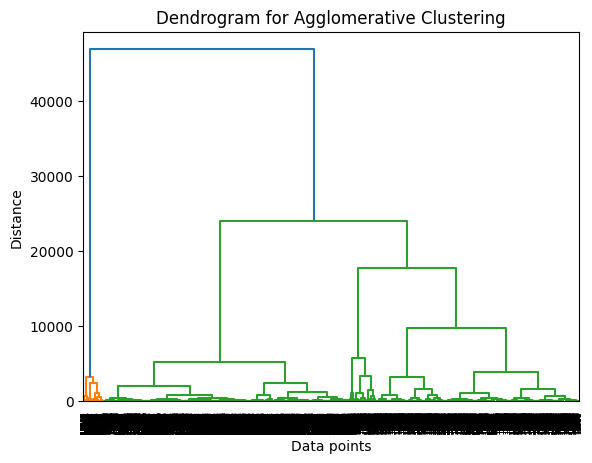

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_cluster.fit(X_resampled)

# create linkage matrix and plot dendrogram
linkage_matrix = linkage(X_resampled, method='ward')
dendrogram(linkage_matrix)

plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


## Conclusion
#### Meilleurs models sont :
----> Classification : RandomForestClassifier avec la methode Recursive Feature Selection 
qui a obtenu un F1-score: 0.9764

----> Clustring : AgglomerativeClustering avec la methode Sequential Feature Selection qui a obtenu un Silhouette Score : 0.8355